In [65]:
import torch
print(torch.__version__)

2.1.1+cu118


In [66]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Creating a dataframe that consists of `image_id`, `image_name` and `category_id`

In [67]:
def modify_box(box):
    # Adding x_min to x_max and y_min to y_max
    box[2] = box[0] + box[2]
    box[3] = box[1] + box[3]
    return box

In [80]:
import os
import json
import pandas as pd
import glob

def create_df(folder_path):
    '''
    Args:
        folder_path: Provide the path of the folder where and annotations.json is present

    return: dataframe
    '''
    json_file = glob.glob(f"{folder_path}/*.json")
    annot_file = open(json_file[0])
    annot = json.load(annot_file)
    annot_ids = []
    annot_image_ids = []
    annot_category_ids = []
    bbox = []

    NUM_CLASSES = len(annot['categories'])

    for ids in range(len(annot['annotations'])):
        annot_ids.append(annot['annotations'][ids]['id'])
        annot_image_ids.append(annot['annotations'][ids]['image_id'])
        annot_category_ids.append(annot['annotations'][ids]['category_id'])
        bbox.append(annot['annotations'][ids]['bbox'])

    image = {}
    for ids in range(len(annot['images'])):
        image.update({annot['images'][ids]['id'] : annot['images'][ids]['file_name']})

    df = pd.DataFrame({
    'id': annot_ids,
    'image_id': annot_image_ids,
    'category_id': annot_category_ids,
    'bbox': bbox
    })

    df['image_filename'] = df['image_id'].map(image)
    df['bbox'] = df['bbox'].apply(modify_box)

    return df, NUM_CLASSES

In [81]:
train_df, NUM_CLASSES = create_df('./Self-Driving Cars.v6-version-4-prescan-416x416.coco/train/')

In [82]:
train_df

,id,image_id,category_id,bbox,image_filename
0,0,0,7,"[93, 121, 265, 263.5]",00000_00005_00010_png.rf.00b7dad32993f94b44235...
1,1,1,4,"[68, 59, 301, 305.5]",00007_00014_00016_png.rf.00659738f01377eae3328...
2,2,2,1,"[191, 58, 36, 20]",000962_JPG_jpg.rf.000e938b3d508690aa01a2b47d11...
3,3,3,1,"[220, 86, 17.5, 11]",FisheyeCamera_1_00206_png.rf.00839887cbdb7f5fd...
4,4,3,1,"[290, 104, 12, 9]",FisheyeCamera_1_00206_png.rf.00839887cbdb7f5fd...
...,...,...,...,...,...
4293,4293,3526,12,"[98, 103, 236, 232]",00004_00036_00003_png.rf.ffb59c0df3db470a10139...
4294,4294,3527,8,"[122, 82, 218.5, 278.5]",00001_00030_00005_png.rf.ffdae2af318eebb9d2b4b...
4295,4295,3528,1,"[210, 160, 15.5, 44]",FisheyeCamera_1_00473_png.rf.fff78f0224751be1e...
4296,4296,3528,1,"[123, 164, 13.5, 40]",FisheyeCamera_1_00473_png.rf.fff78f0224751be1e...


In [50]:
val_df, NUM_CLASSES = create_df('./Self-Driving Cars.v6-version-4-prescan-416x416.coco/valid')
val_df

,id,image_id,category_id,bbox,image_filename
0,0,0,13,"[61, 55, 366, 370]",00005_00019_00023_png.rf.3fa9a988aa0486f9328a4...
1,1,1,1,"[159, 46, 255.5, 77]",000982_JPG_jpg.rf.3dd252db590da0f9bd0fbe123d59...
2,2,1,1,"[83, 180, 115, 193.5]",000982_JPG_jpg.rf.3dd252db590da0f9bd0fbe123d59...
3,3,2,15,"[183, 66, 355.5, 341]",road73_png.rf.3d3e70e98db37845a47dbf47ceb49047...
4,4,2,2,"[77, 131, 131.5, 263]",road73_png.rf.3d3e70e98db37845a47dbf47ceb49047...
...,...,...,...,...,...
939,939,796,12,"[58, 168, 368.5, 351.5]",000460_jpg.rf.3be56562d86269ad806603bb1cdb710c...
940,940,797,7,"[117, 107, 338.5, 335.5]",00000_00005_00004_png.rf.3b1da84bffee4d187959b...
941,941,798,8,"[45, 47, 375, 376.5]",00001_00007_00010_png.rf.3b97ab40ade2235e54b1c...
942,942,799,1,"[183, 205, 186, 207]",FisheyeCamera_1_00040_png.rf.3cecfad4b5ce1e131...


In [51]:
NUM_CLASSES

16

In [77]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
def plot_image_with_bbox(df, index):
    # Read the image
    image_path = "./Self-Driving Cars.v6-version-4-prescan-416x416.coco/train/" + df.iloc[index]['image_filename']
    image = Image.open(image_path)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Get bounding box
    bbox = df.iloc[index]['bbox']
    xmin, ymin, xmax, ymax = bbox  # Updated to use xmax and ymax

    # Calculate width and height from xmax and ymax
    width = xmax - xmin
    height = ymax - ymin

    # Create a Rectangle patch for the bounding box
    rect = patches.Rectangle(
        (xmin, ymin), width, height,
        linewidth=2, edgecolor='red', facecolor='none'
    )

    # Add the bounding box rectangle to the plot
    ax.add_patch(rect)

    # Add label (optional)
    plt.text(
        xmin, ymin, 
        f"Class: {df.iloc[index]['category_id']}", 
        bbox=dict(facecolor='white', alpha=0.5)
    )

    # Show the plot
    plt.show()


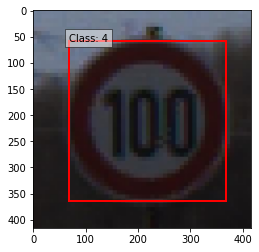

In [78]:
plot_image_with_bbox(train_df, 1)

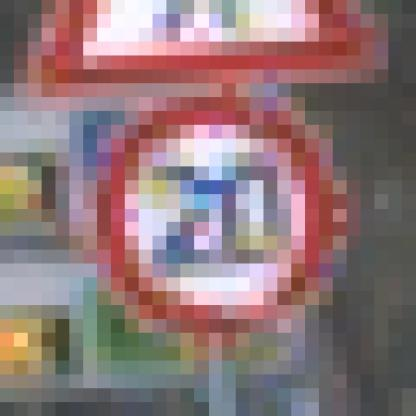

In [53]:
from PIL import Image
img = Image.open('./Self-Driving Cars.v6-version-4-prescan-416x416.coco/train/00000_00000_00002_png.rf.c8ad86390583e313b909403180f01ffd.jpg')
img

In [54]:
import  numpy as np
img_as_array = np.asarray(img)
img_as_array.shape

(416, 416, 3)

In [55]:
dir = './Self-Driving Cars.v6-version-4-prescan-416x416.coco/'
train_dir = dir + 'train/'
val_dir = dir + 'valid/'

### Creating `train_data`

In [56]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [57]:
import os
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from PIL import Image

class CustomObjectDetectionDataset(torch.utils.data.Dataset):
    def __init__(self, df, root, device='cuda', transform=None):
        self.root = root
        self.transform = transform
        self.df = df
        self.device = device

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Load image
        img_filename = self.df.iloc[idx]['image_filename']
        img_path = os.path.join(self.root, img_filename)
        img = Image.open(img_path)

        # Load bounding box and category information
        # Modify this part based on how your bounding box and category data is structured
        bbox = self.df.iloc[idx]['bbox']
        category = self.df.iloc[idx]['category_id']

        # Apply transformations
        if self.transform:
            img = self.transform(img)

        img = img.to(self.device)
        bbox = torch.tensor(bbox, device=self.device, dtype=torch.float32)
        category = torch.tensor(category, dtype = torch.int64, device = self.device)
        return img, [{'boxes': bbox, 'labels': category}]

# Define your data transformations
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(([0.485, 0.456, 0.406]), ([0.229, 0.224, 0.225]))
    # Add other transformations if needed
])

In [58]:
train_data = CustomObjectDetectionDataset(df = train_df, root=train_dir, device=device, transform=data_transforms)
val_data = CustomObjectDetectionDataset(df = val_df, root=val_dir, device=device, transform=data_transforms)

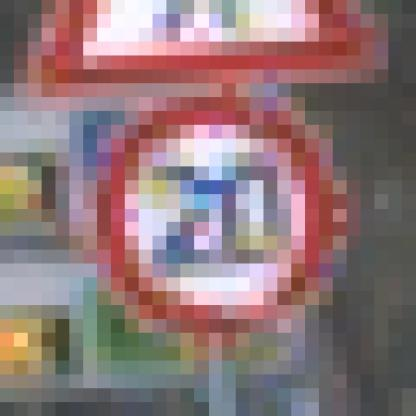

In [42]:
Image.open(os.path.join(train_dir, '000962_JPG_jpg.rf.000e938b3d508690aa01a2b47d1174e7.jpg'))

In [21]:
BATCH_SIZE = 1

train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_dataloader = DataLoader(
    val_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

In [22]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model_0 = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights='DEFAULT').to(device)
in_features = model_0.roi_heads.box_predictor.cls_score.in_features
model_0.roi_heads.box_predictor = FastRCNNPredictor(in_features, NUM_CLASSES)

In [106]:
train_df['category_id'] = train_df['category_id'] + 1

In [107]:
train_df

,id,image_id,category_id,bbox,image_filename
0,0,0,8,"[93, 121, 265, 263.5]",00000_00005_00010_png.rf.00b7dad32993f94b44235...
1,1,1,5,"[68, 59, 301, 305.5]",00007_00014_00016_png.rf.00659738f01377eae3328...
2,2,2,2,"[191, 58, 36, 20]",000962_JPG_jpg.rf.000e938b3d508690aa01a2b47d11...
3,3,3,2,"[220, 86, 17.5, 11]",FisheyeCamera_1_00206_png.rf.00839887cbdb7f5fd...
4,4,3,2,"[290, 104, 12, 9]",FisheyeCamera_1_00206_png.rf.00839887cbdb7f5fd...
...,...,...,...,...,...
4293,4293,3526,13,"[98, 103, 236, 232]",00004_00036_00003_png.rf.ffb59c0df3db470a10139...
4294,4294,3527,9,"[122, 82, 218.5, 278.5]",00001_00030_00005_png.rf.ffdae2af318eebb9d2b4b...
4295,4295,3528,2,"[210, 160, 15.5, 44]",FisheyeCamera_1_00473_png.rf.fff78f0224751be1e...
4296,4296,3528,2,"[123, 164, 13.5, 40]",FisheyeCamera_1_00473_png.rf.fff78f0224751be1e...


In [23]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 416, 416])

Layer (type:depth-idx)                                  Output Shape              Param #
FasterRCNN                                              [0, 4]                    --
├─GeneralizedRCNNTransform: 1-1                         [1, 3, 800, 800]          --
├─BackboneWithFPN: 1-2                                  [1, 256, 13, 13]          --
│    └─IntermediateLayerGetter: 2-1                     [1, 2048, 25, 25]         --
│    │    └─Conv2d: 3-1                                 [1, 64, 400, 400]         (9,408)
│    │    └─FrozenBatchNorm2d: 3-2                      [1, 64, 400, 400]         --
│    │    └─ReLU: 3-3                                   [1, 64, 400, 400]         --
│    │    └─MaxPool2d: 3-4                              [1, 64, 200, 200]         --
│    │    └─Sequential: 3-5                             [1, 256, 200, 200]        (212,992)
│    │    └─Sequential: 3-6                             [1, 512, 100, 100]        1,212,416
│    │    └─Sequential: 3-7              

In [24]:
optimizer = torch.optim.Adam(params=model_0.parameters(), lr = 0.001)

In [146]:
from tqdm.auto import tqdm
torch.manual_seed(42)
NUM_EPOCHS = 100

for epoch in tqdm(range(NUM_EPOCHS)):
    print(f"---- Epoch: {epoch} ----")
    model_0.train()
    for images, targets in train_dataloader:
        train_loss_dict = model_0(images, targets)

        # Compute the total loss
        total_train_loss = sum(loss for loss in train_loss_dict.values())

        # Backward pass
        optimizer.zero_grad()
        total_train_loss.backward()

        # Optimization step
        optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        for images, targets in val_dataloader:
            val_loss_dict = model_0(images)
            total_val_loss = sum(loss for loss in val_loss_dict.values())

    print(f"Train Loss: {total_train_loss:.5f} | Test Loss: {total_val_loss}")

  0%|          | 0/100 [00:00<?, ?it/s]

---- Epoch: 0 ----


OutOfMemoryError: CUDA out of memory. Tried to allocate 40.00 MiB. GPU 0 has a total capacty of 2.00 GiB of which 0 bytes is free. Of the allocated memory 1.65 GiB is allocated by PyTorch, and 53.39 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [102]:
import torchvision
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
# For training
images, boxes = torch.rand(4, 3, 600, 1200), torch.rand(4, 11, 4)
boxes[:, :, 2:4] = boxes[:, :, 0:2] + boxes[:, :, 2:4]
labels = torch.randint(1, 91, (4, 11))
images = list(image for image in images)
targets = []
for i in range(len(images)):
    d = {}
    d['boxes'] = boxes[i]
    d['labels'] = labels[i]
    targets.append(d)

output = model(images, targets)
# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)
predictions

[{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>),
  'labels': tensor([], dtype=torch.int64),
  'scores': tensor([], grad_fn=<IndexBackward0>)},
 {'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>),
  'labels': tensor([], dtype=torch.int64),
  'scores': tensor([], grad_fn=<IndexBackward0>)}]

In [88]:
images[0]

tensor([[[9.9031e-01, 4.5297e-01, 5.5890e-01,  ..., 8.4537e-02,
          2.2165e-01, 4.5423e-01],
         [1.4220e-01, 3.4990e-01, 6.8404e-01,  ..., 3.8002e-01,
          7.3164e-01, 4.1043e-01],
         [1.3347e-01, 9.3277e-01, 3.7615e-01,  ..., 4.1500e-01,
          2.5116e-02, 2.1432e-01],
         ...,
         [6.2466e-01, 6.3013e-01, 1.0207e-01,  ..., 6.9192e-02,
          8.7203e-01, 2.4981e-02],
         [1.3450e-01, 7.6452e-01, 7.3240e-01,  ..., 3.5330e-01,
          3.4007e-01, 2.8836e-01],
         [6.7711e-01, 1.3946e-01, 1.6465e-01,  ..., 7.8451e-01,
          1.6299e-01, 1.7493e-01]],

        [[2.1815e-01, 6.4849e-01, 9.0885e-01,  ..., 4.2268e-01,
          5.8132e-01, 4.0587e-01],
         [1.2497e-01, 3.4675e-01, 2.3705e-03,  ..., 8.9670e-01,
          6.2489e-01, 6.8890e-01],
         [7.4607e-01, 7.2386e-01, 2.8949e-01,  ..., 6.4639e-01,
          6.1113e-01, 2.5118e-01],
         ...,
         [3.7924e-01, 6.1523e-01, 2.2666e-01,  ..., 2.5638e-01,
          6.236

In [91]:
images[0].shape

torch.Size([3, 600, 1200])

In [95]:
t = images[0].unsqueeze(0)

In [96]:
t.shape

torch.Size([1, 3, 600, 1200])

In [26]:
output

{'loss_classifier': tensor(0.3851, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.0283, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(2.0624, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(1.1502, grad_fn=<DivBackward0>)}

In [99]:
model.eval()
with torch.inference_mode():
    pred = model(images)

In [100]:
pred

[{'boxes': tensor([], size=(0, 4)),
  'labels': tensor([], dtype=torch.int64),
  'scores': tensor([])},
 {'boxes': tensor([], size=(0, 4)),
  'labels': tensor([], dtype=torch.int64),
  'scores': tensor([])},
 {'boxes': tensor([], size=(0, 4)),
  'labels': tensor([], dtype=torch.int64),
  'scores': tensor([])},
 {'boxes': tensor([], size=(0, 4)),
  'labels': tensor([], dtype=torch.int64),
  'scores': tensor([])}]